In [1]:
import os
import PIL
import math
import sys
import shutil
import glob
from math import floor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [10]:
%cd /home/jovyan/work/images
print(os.listdir('.'))
print(os.getcwd())

inp_img_dir = './input'
out_dir = './output'
start_num = 1

/home/jovyan/work/images
['.DS_Store', 'input', 'output', 'sorted']
/home/jovyan/work/images


## Helper functions

In [11]:
def dir_create(path):
    if (os.path.exists(path)) and (os.listdir(path) != []):
        shutil.rmtree(path)
        os.makedirs(path)
    if not os.path.exists(path):
        os.makedirs(path)

In [12]:
def crop(input_file, height, width):
    img = Image.open(input_file)
    img_width, img_height = img.size
    for i in range(img_height//height):
        for j in range(img_width//width):
            box = (j*width, i*height, (j+1)*width, (i+1)*height)
            yield img.crop(box)

In [13]:
def split(inp_img_dir, out_dir, 
          start_num):
    # image_dir = os.path.join(out_dir, 'images')
    image_dir = out_dir
    dir_create(out_dir)
    dir_create(image_dir)
    img_list = [f for f in
                os.listdir(inp_img_dir)
                if os.path.isfile(os.path.join(inp_img_dir, f))]
    file_num = 0
    for infile in img_list:
        infile_path = os.path.join(inp_img_dir, infile)
        image = PIL.Image.open(infile_path)
        height, width = image.size
        print(height, width)
        height_split = floor(height / 7)
        width_split = floor(width / 7)
        print(height_split, width_split)

        for k, piece in enumerate(crop(infile_path,
                                       height_split, width_split), start_num):
            img = Image.new('RGB', (height_split, width_split), 255)
            img.paste(piece)
            img_path = os.path.join(image_dir, 
                                    infile.split('.')[0]+ '_'
                                    + str(k).zfill(5) + '.jpg')
            img.save(img_path)
        file_num += 1
        sys.stdout.write("\rFile %s was processed." % file_num)
        sys.stdout.flush()

## Split image into segments

In [18]:
input_images_list = glob.glob(inp_img_dir + '/*.jpg')
split(inp_img_dir, out_dir, start_num)

1024 1024
146 146
File 1 was processed.448 448
64 64
File 2 was processed.978 978
139 139
File 3 was processed.978 978
139 139
File 4 was processed.978 978
139 139
File 5 was processed.978 978
139 139
File 6 was processed.978 978
139 139
File 7 was processed.978 978
139 139
File 8 was processed.

## Plot image segments

In [19]:
def image_part_plotter(images_list, offset):
    fig = plt.figure(figsize=(14, 14))
    columns = 7
    rows = 7
    # ax enables access to manipulate each of subplots
    ax = []
    for i in range(columns*rows):
        # create subplot and append to ax
        img = mpimg.imread(images_list[i+offset])
        ax.append(fig.add_subplot(rows, columns, i+1))
        ax[-1].set_title('image ' + str(i+1))
        plt.imshow(img)
        plt.axis('off')
    plt.show() # Render the plot

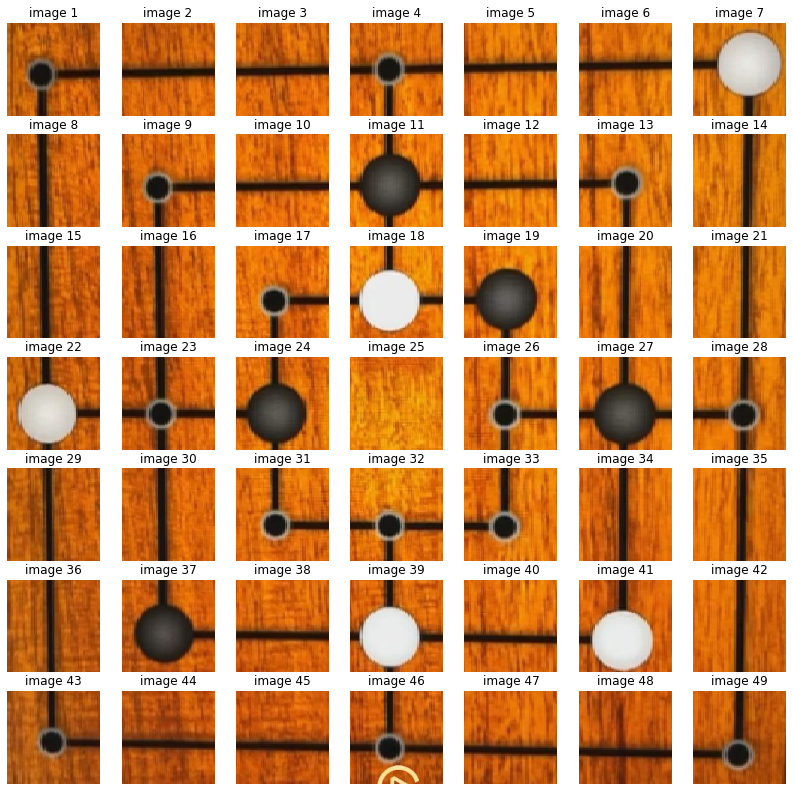

In [20]:
output_images_list = glob.glob(out_dir + '/mill_00008*.jpg')
image_part_plotter(output_images_list, 0)